<Center><h1>News Sentiment Analysis</h1></center>

<img src="nsa.jpg">



In [1]:
# Dependencies
import tweepy
import json
import numpy as np
import time
import pandas as pd
import time
from matplotlib import pyplot as plt
import seaborn as sns
import csv
import os
from config import ck, cs, at, ats

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys 
consumer_key = ck
consumer_secret =cs
access_token = at
access_token_secret = ats

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [2]:
# Target Search Term
target_terms = ("@BBCNews", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")

# List for tweet data
table_dict = []
# Loop through all targets
for target in target_terms:
    counter=101
    public_tweets = api.user_timeline(target, count=100, result_type="recent")
#     tweetstorage[target]= public_tweets
    for tweet in public_tweets:

        # Run VAnalysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweetorder=counter-1
        counter=counter-1
        #Temp store other values
        date=time.strftime('%m/%d/%Y', time.strptime(tweet['created_at'],'%a %b %d %H:%M:%S +0000 %Y'))
        text=(tweet["text"])
        name=(tweet["user"]["name"])

        #append value to DataFrame
        table_dict.append({"Media Sources":name,"Tweet Polarity":compound,"Positive":pos,"Neutral":neu,
                          "Date":date,"Text":text,"Tweets Ago":tweetorder})
        
table_dict=pd.DataFrame(table_dict)
table_dict.head()


,Date,Media Sources,Neutral,Positive,Text,Tweet Polarity,Tweets Ago
0,09/21/2017,BBC News (UK),0.686,0.000,House of Lords rejects 'flawed' expenses repor...,-0.4939,100
1,09/21/2017,BBC News (UK),0.446,0.000,"Boy, 17, arrested over Tube attack https://t.c...",-0.7351,99
2,09/21/2017,BBC News (UK),0.672,0.000,James Herbert death: Watchdog makes police res...,-0.5994,98
3,09/20/2017,BBC News (UK),0.882,0.000,Quit smoking campaign Stoptobber backs e-cigs ...,-0.0516,97
4,09/20/2017,BBC News (UK),0.598,0.231,Chronic fatigue therapy 'could help teenagers'...,0.1779,96


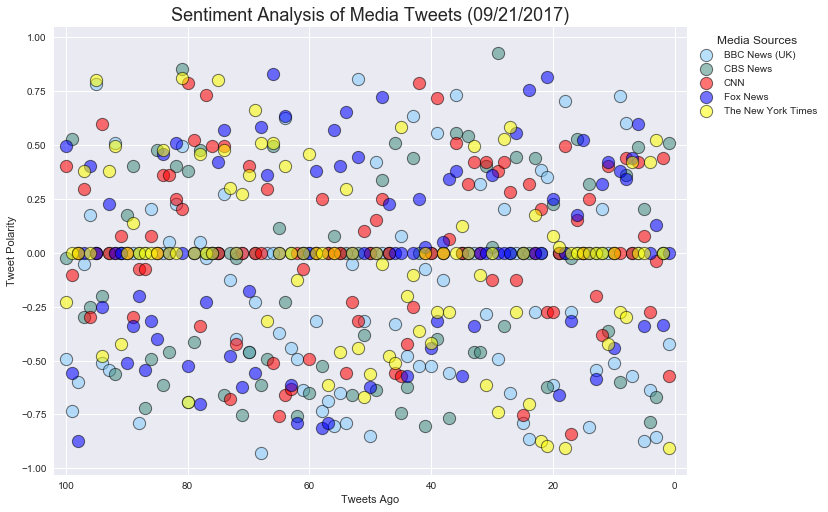

In [4]:
#create lmplot using seasborn
#set colorlist for charts
clrlist = ["#82CAFA", "#438D80", "#FF0000", "#0000FF", "#FFFF00"]
sns.set_palette(clrlist)

#create chart
MediaTweetAnalysis=sns.lmplot(x="Tweets Ago", y="Tweet Polarity", data= table_dict, 
           hue="Media Sources",  size=7, aspect=1.4 ,
           legend_out = True, legend = False, 
           scatter_kws={"s":150, 
                        'alpha':.55,'edgecolors':"black", 'linewidth':1},ci=0, fit_reg=False, )

plt.xlim(102,-2)
plt.title("Sentiment Analysis of Media Tweets ("+str(table_dict["Date"][2])+")", fontsize=18)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1, title="Media Sources")
plt.savefig("Output/NSA_MediaTweets.png", bbox_inches='tight')
plt.show(MediaTweetAnalysis)


In [5]:
#create dataframe for using groupby
table_dict1 = pd.DataFrame(table_dict.groupby(["Media Sources"])["Tweet Polarity"].mean()).reset_index()
table_dict1

,Media Sources,Tweet Polarity
0,BBC News (UK),-0.156798
1,CBS News,-0.068770
2,CNN,0.024572
3,Fox News,0.001959
4,The New York Times,-0.017140


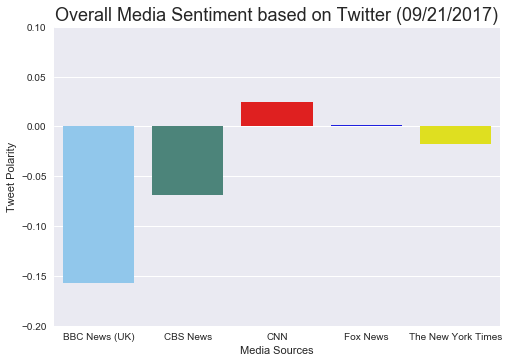

In [6]:
#create barplot using seaborn
MediaSent_O=sns.barplot(x="Media Sources", y="Tweet Polarity", data=table_dict1)
plt.ylim(-.2,.1)
plt.ylabel('Tweet Polarity')
plt.title("Overall Media Sentiment based on Twitter ("+str(table_dict["Date"][2])+")", fontsize=18)
plt.savefig("Output/NSA_OverallSentiment.png", bbox_inches='tight')
plt.show(MediaSent_O)


In [8]:
#export dataframe to csv file
table_dict.to_csv('Output/newsanalysis.csv', index=False)
